# **Covid Prediction** **Model** 

Importing libraries

In [2]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


pyo.init_notebook_mode(connected=True)
cf.go_offline()
from plotly.offline import init_notebook_mode,plot,iplot
plotly.io.renderers.default = 'colab'

loading dataset

In [3]:
#reading the dataset using pandas library
df = pd.read_csv('state_wise_daily.csv',parse_dates=['Date','Date_YMD'])

In [4]:
#This head method prints the first 10 data rows from the dataset 
df.head(10)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,2020-03-14,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,2020-03-14,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,2020-03-14,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-15,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,2020-03-15,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
5,2020-03-15,2020-03-15,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-03-16,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
7,2020-03-16,2020-03-16,Recovered,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,2020-03-16,2020-03-16,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-03-17,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0


In [5]:
#this will provide the matrix (mxn) of the dataset like : number of rows x number of columns
df.shape

(1383, 42)

Data cleaning and preprocessing

In [6]:
# below we are extracting the data only which is required 
# using pandas library we are taking west bengal state
# we are taking date and status columns of west bengal from the dataset
pivot = pd.pivot_table(df,values='WB',index='Date_YMD',columns='Status').sort_values(by='Date_YMD') #seperating of relevant features

converting into dataframe

In [7]:
#we are converting the data into a dataframe 
#using pandas library
finalData = pd.DataFrame(pivot)

Resetting index according to the new data

In [8]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [35]:
#This will print the first five data rows of the dataframe which we are going to use
#for our predictions.
finalData.head()

Status,Date_YMD,Confirmed,Deceased,Recovered
0,2020-03-14,0,0,0
1,2020-03-15,0,0,0
2,2020-03-16,0,0,0
3,2020-03-17,1,0,0
4,2020-03-18,0,0,0


In [10]:
#This will print the datatypes of the dataframe.
finalData.dtypes

Status
Date_YMD     datetime64[ns]
Confirmed             int64
Deceased              int64
Recovered             int64
dtype: object

# **Future Prediction of Confirmed Cases on** **finalData** ****

**Visualization of the data we make predictions**

In [11]:
#Plotting the graph of the confirmed cases of west bengal state from the dataset
#With respect to the date 
finalData.iplot(kind='scatter',x='Date_YMD',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

**Seperating different categories**

In [12]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date_YMD','Confirmed']]
Recovered = finalData[['Date_YMD','Recovered']]
Deceased = finalData[['Date_YMD','Deceased']]

In [13]:
#Confirmed cases data
Confirmed.head()

Status,Date_YMD,Confirmed
0,2020-03-14,0
1,2020-03-15,0
2,2020-03-16,0
3,2020-03-17,1
4,2020-03-18,0


In [14]:
#Confirmed cases data types
Confirmed.dtypes

Status
Date_YMD     datetime64[ns]
Confirmed             int64
dtype: object

**Renaming the columns**

In [15]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

# **Model Initialization and Evaluation**

***We are using fbprophet model for predicting future cases***

In [16]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [17]:
#Fitting the model with data
m.fit(Confirmed)

**Creating the future dataset for future predictions**

In [39]:
# We are making the future dates for predictions
#Here we are predicting for 10 days 
#from 18th june 2021 to 27th june 2021
future = m.make_future_dataframe(periods=10)
future.tail(10)
dtts = future.tail(10)
dtts.to_csv('input.csv')

In [19]:
#forecasting with model
#predicting the cases for the future 10 days 
# ds = dates
#yhat = predicted outputs
# yhat_upper = upper limit the prediction values
#yhat_lower = lower limit of the prediction values
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

,ds,yhat,yhat_upper,yhat_lower
464,2021-06-21,10372.873758,14198.451911,6858.021838
465,2021-06-22,10695.341479,14334.091360,6925.674786
466,2021-06-23,10999.478297,14747.198752,7118.604820
467,2021-06-24,11276.854552,14764.657048,7840.000569
468,2021-06-25,11668.426556,15531.180313,7970.835626
469,2021-06-26,11940.693736,15746.110165,8217.279291
470,2021-06-27,12195.346644,15895.338139,8734.439296


In [20]:
#This is the first 10 rows of the we are predicted
# it shows weakly trends , monthly, yearly trends.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14,757.160731,-5600.213382,1967.352738,757.160731,757.160731,-2383.804275,-2383.804275,-2383.804275,3034.22621,...,72.740577,72.740577,72.740577,-5490.771061,-5490.771061,-5490.771061,0.0,0.0,0.0,-1626.643544
1,2020-03-15,645.262088,-5545.759323,2078.589879,645.262088,645.262088,-2330.051837,-2330.051837,-2330.051837,3034.22621,...,60.718596,60.718596,60.718596,-5424.996643,-5424.996643,-5424.996643,0.0,0.0,0.0,-1684.789750
2,2020-03-16,533.363444,-5436.605957,1699.651484,533.363444,533.363444,-2425.252051,-2425.252051,-2425.252051,3034.22621,...,-98.706728,-98.706728,-98.706728,-5360.771533,-5360.771533,-5360.771533,0.0,0.0,0.0,-1891.888607
3,2020-03-17,421.464801,-5547.483023,1918.528546,421.464801,421.464801,-2314.207707,-2314.207707,-2314.207707,3034.22621,...,-50.488578,-50.488578,-50.488578,-5297.945339,-5297.945339,-5297.945339,0.0,0.0,0.0,-1892.742906
4,2020-03-18,309.566158,-5777.161075,1563.219995,309.566158,309.566158,-2229.321337,-2229.321337,-2229.321337,3034.22621,...,-27.347180,-27.347180,-27.347180,-5236.200367,-5236.200367,-5236.200367,0.0,0.0,0.0,-1919.755179


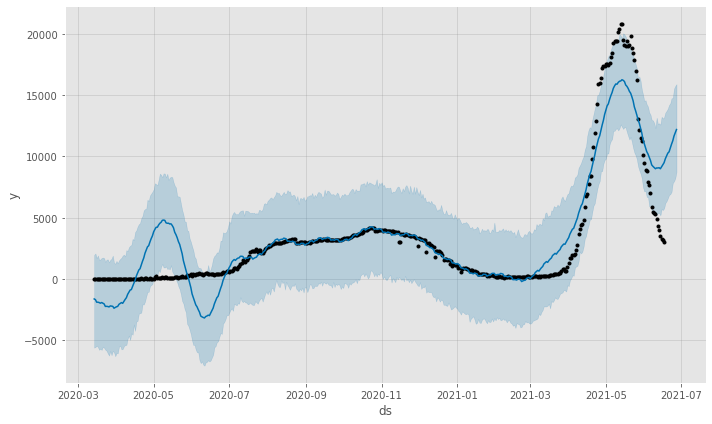

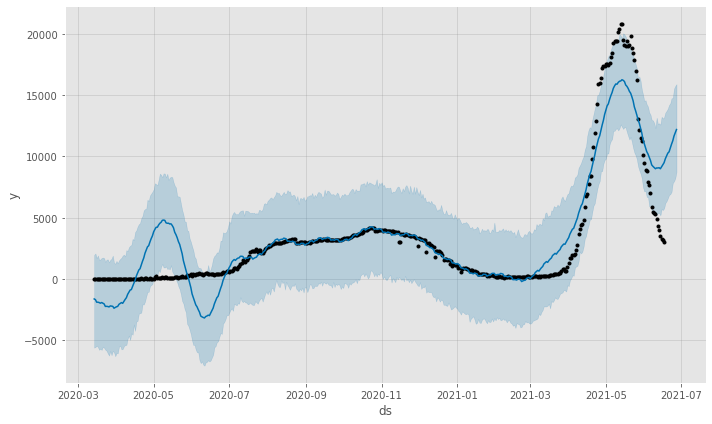

In [21]:
#forecast plot 
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot

# ***Recovery cases prediction*** 

Model initilization

In [22]:
#instantiating model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
m1 = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

**Fitting the model with the recovered cases data**

In [23]:
#fit the model
m1.fit(Recovered)

In [24]:
# We are making the future dates for predictions
#Here we are predicting for 10 days 
#from 18th june 2021 to 27th june 2021
forecast_1 = m1.predict(future) #predictions

In [25]:
#printing the last 10 values of the predicted data.
forecast_1[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

,ds,yhat,yhat_upper,yhat_lower
461,2021-06-18,10596.035461,14123.776155,6772.285682
462,2021-06-19,10667.071652,14304.557996,6739.117313
463,2021-06-20,10782.878935,14504.378737,7308.496657
464,2021-06-21,10885.239856,14782.742594,7070.181518
465,2021-06-22,11030.599048,14716.370637,7524.585140
466,2021-06-23,11197.285252,14598.606787,7460.004984
467,2021-06-24,11323.051876,14842.967760,7653.227039
468,2021-06-25,11663.706969,15391.312690,7913.173196
469,2021-06-26,11907.726661,15670.045813,8129.059660
470,2021-06-27,12171.865690,15897.695829,8437.270421


In [26]:
#ploting the total recovered cases of the west bengal state from the dataset
finalData.iplot(kind='scatter',x='Date_YMD',y='Recovered',xTitle='Months',yTitle='Count of Cases',title='Recovered') #visualizations

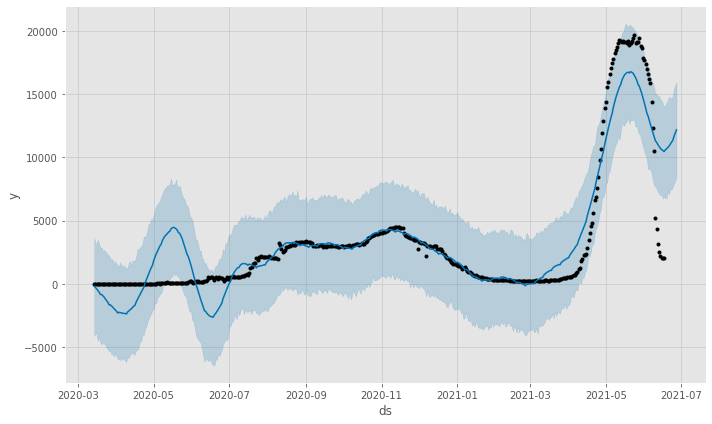

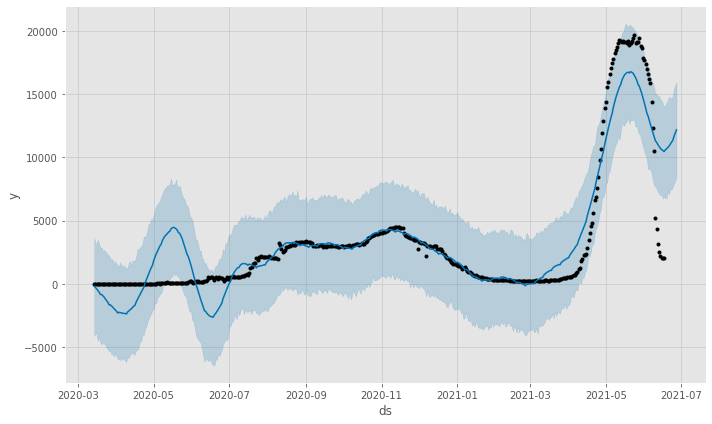

In [27]:
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
recovered_forecast_plot = m1.plot(forecast_1)
recovered_forecast_plot

# **Death Cases prediction**

In [28]:
#instantiating model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
m2 = Prophet(interval_width=0.9,daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True) #Instantiating Model

**Fitting the model with Death cases Data**

In [29]:
#fitting the data to the model
m2.fit(Deceased) 

# **Visualization**

In [30]:
#plotting the death cases data from the dataset of west bengal state
finalData.iplot(kind='scatter',x='Date_YMD',y='Deceased',xTitle='Months',yTitle='Count of Cases',title='DECEASED')

In [31]:
# We are making the future dates for predictions
#Here we are predicting for 10 days 
#from 18th june 2021 to 27th june 2021
forecast_2 = m2.predict(future) #predictions

In [32]:
#printing the last 7 rows of the predicted data
forecast_2[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

,ds,yhat,yhat_upper,yhat_lower
464,2021-06-21,109.339579,124.730018,94.210382
465,2021-06-22,111.655962,126.732683,96.074174
466,2021-06-23,112.861638,128.864851,97.583666
467,2021-06-24,113.871096,129.368013,98.324649
468,2021-06-25,115.923342,129.963828,101.098144
469,2021-06-26,117.886545,133.265844,101.650258
470,2021-06-27,119.852284,135.055272,104.848404


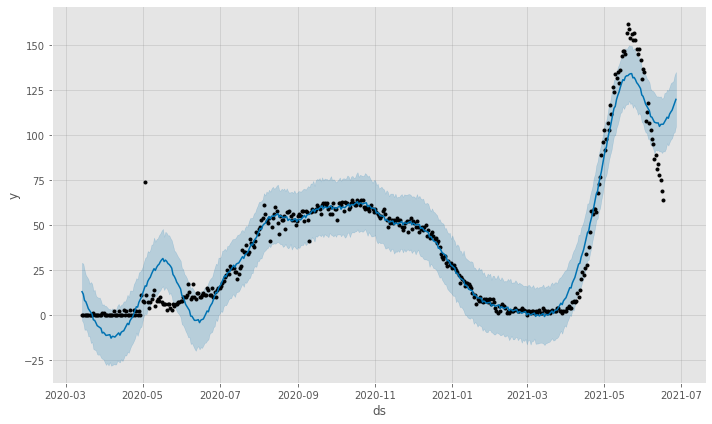

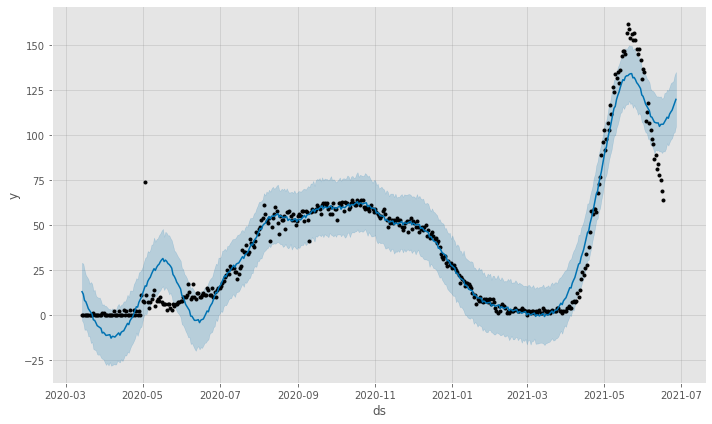

In [33]:
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used
deceased_forecast_plot = m2.plot(forecast_2) #forecast plot
deceased_forecast_plot